# Study of the parallel program's effectiveness

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set_style("darkgrid")

# 1. n0786-g7x
constant problem size

In [2]:
dfa = pd.read_csv('./times12intel.csv', header=0)

number of repetitions

In [3]:
dfa.groupby(["z_n", "i", "p"], as_index= False).count()['t'].head(1)

0    3
Name: t, dtype: int64

In [4]:
# ile danych dla danego rozmiaru problemu
ile = dfa.groupby(["z_n"], as_index= False).count()['t'][0]
print(ile)

36


initial data check

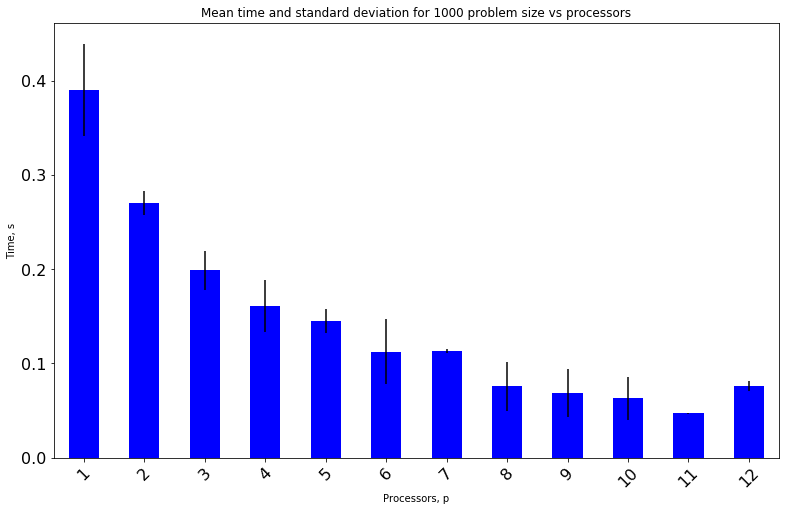

In [5]:
df=dfa[:ile]
std = df.groupby(["p"], as_index= False).std()
std.index+=1
s = df.groupby(["p"], as_index= False).mean()['t']
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for {n} problem size vs processors".format(n=df['n'][ile*0]))
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

noticeably greater variance in calculation time for the smallest problem compared to the others

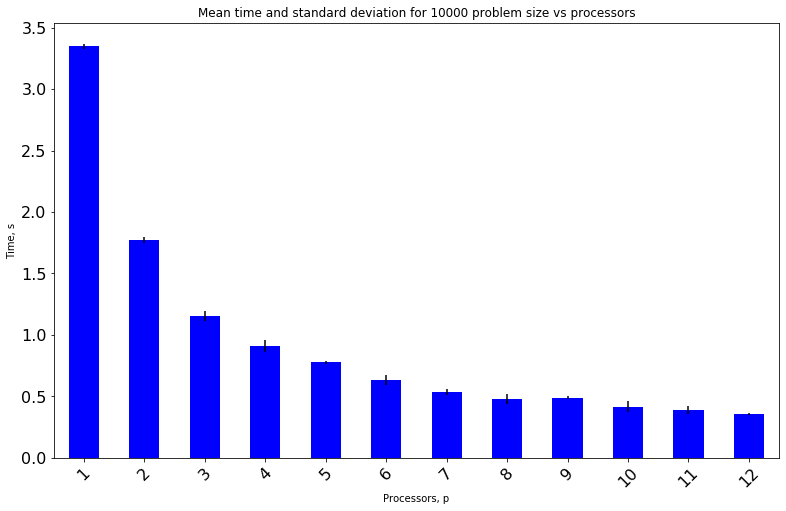

In [6]:
df=dfa[ile:ile*2]
std = df.groupby(["p"], as_index= False).std()
std.index+=1
s = df.groupby(["p"], as_index= False).mean()['t']
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for {n} problem size vs processors".format(n=df['n'][ile*1]))
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

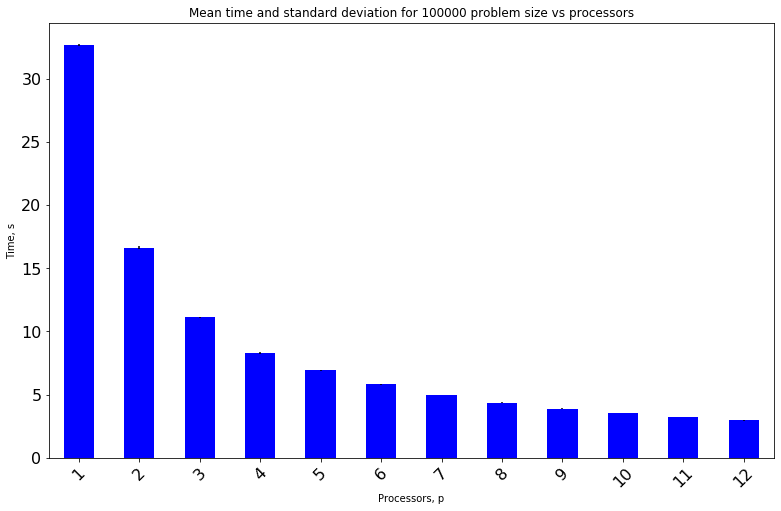

In [7]:
df=dfa[ile*2:ile*3]
std = df.groupby(["p"], as_index= False).std()
std.index+=1
s = df.groupby(["p"], as_index= False).mean()['t']
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for {n} problem size vs processors".format(n=df['n'][ile*2]))
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

## Calculations

In [8]:
ile_p = dfa.groupby(["z_n"], as_index= False).max()['p'][0]
s = dfa.groupby(["z_n","p"], as_index= False).mean()
s['t_1p'] = 0
s['t_1p'][0:ile_p] = s['t'][0]
s['t_1p'][ile_p:ile_p*2] = s['t'][ile_p]
s['t_1p'][ile_p*2:ile_p*3] = s['t'][ile_p*2]
s['speedup'] = s['t_1p']/s['t']
s['effectiveness'] = s['speedup']/s['p']
s

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,z_n,p,n,i,t,t_1p,speedup,effectiveness
0,1000,1,1000,100,0.390692,0.390692,1.000000,1.000000
1,1000,2,1000,100,0.270624,0.390692,1.443667,0.721834
2,1000,3,999,100,0.198787,0.390692,1.965377,0.655126
3,1000,4,1000,100,0.161063,0.390692,2.425713,0.606428
4,1000,5,1000,100,0.145057,0.390692,2.693374,0.538675
5,1000,6,996,100,0.112669,0.390692,3.467615,0.577936
6,1000,7,994,100,0.113520,0.390692,3.441601,0.491657
7,1000,8,1000,100,0.075868,0.390692,5.149630,0.643704
8,1000,9,999,100,0.068934,0.390692,5.667608,0.629734
9,1000,10,1000,100,0.062877,0.390692,6.213591,0.621359


# Plots
points connected with lines were used for the charts
the points show accurate results, and the connecting lines allow easier observation of trends

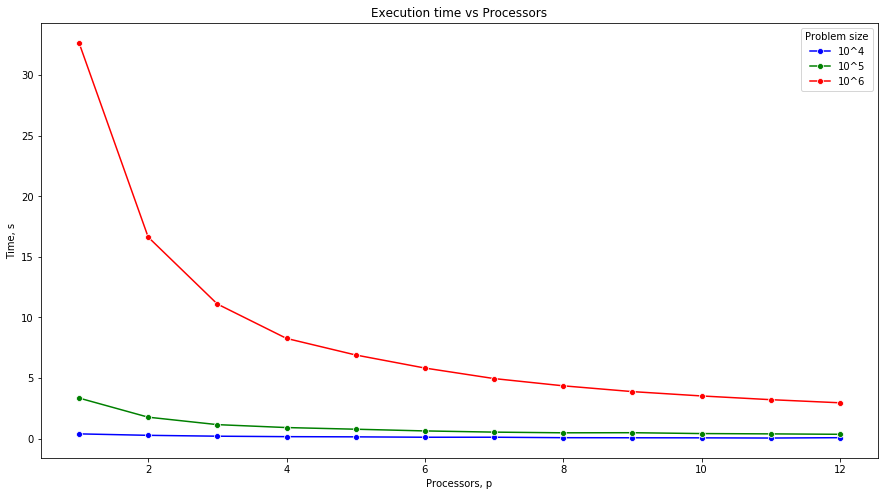

In [9]:
g = sns.lineplot(x="p", y="t", style="z_n", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.set_title("Execution time vs Processors")
g.set(xlabel='Processors, p', ylabel='Time, s')
plt.legend(title='Problem size', labels=['10^4', '10^5', '10^6'])
g.figure.set_size_inches(15, 8)

because the size of the task is constant and the number of processors increases, the calculation time decreases

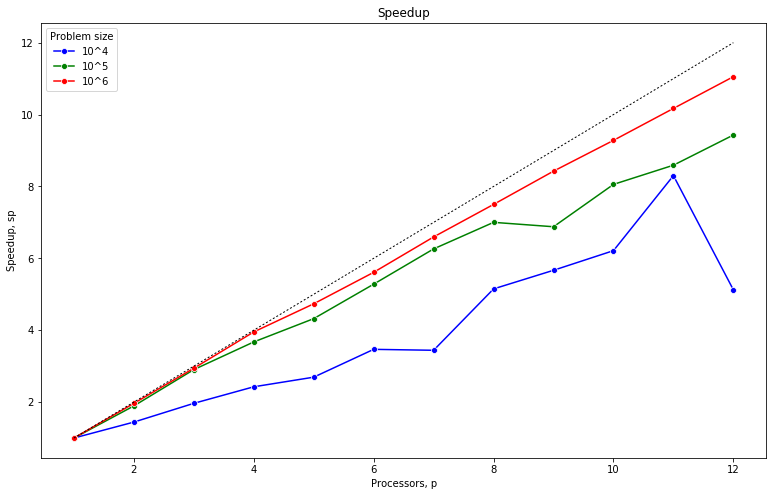

In [10]:
g = sns.lineplot(x="p", y="speedup", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.plot([1, 12], [1, 12], 'k-', lw=1,dashes=[2, 2])
g.set_title("Speedup")
g.set(xlabel='Processors, p', ylabel='Speedup, sp')
plt.legend(title='Problem size', labels=['10^4', '10^5', '10^6'])
g.figure.set_size_inches(13, 8)

perfect speedup for the largest problem size up to four processors due to the large amount of computation compared to communication

noticeably less speedup for the smallest size of the problem, the impact of a large amount of communication in relation to calculations

in the version with unscaled problem size, both scaled and unscaled acceleration are the same

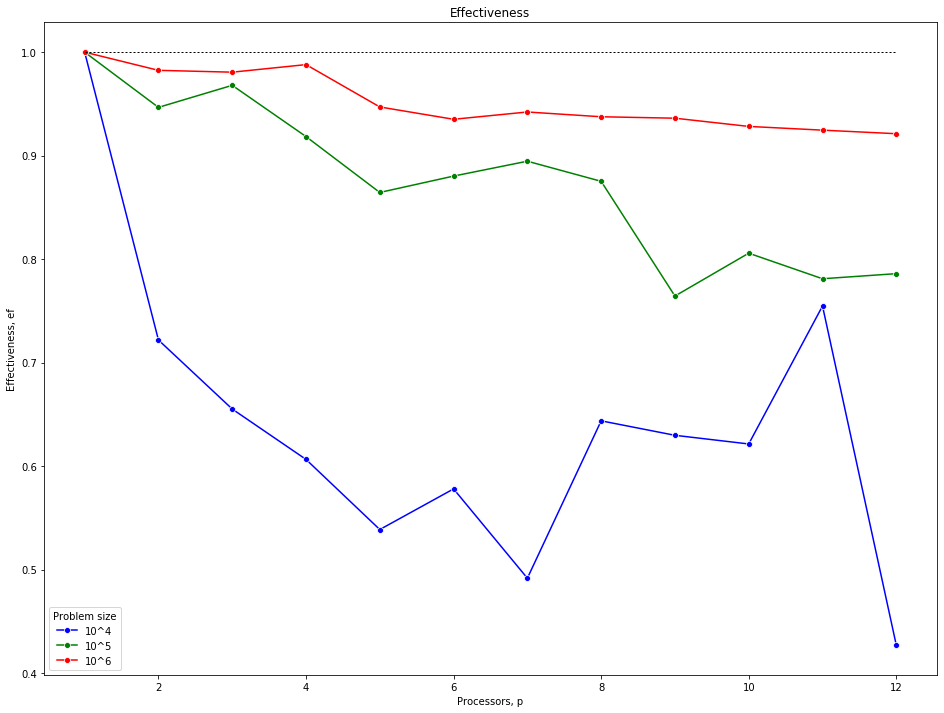

In [11]:
g = sns.lineplot(x="p", y="effectiveness", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.set_title("Effectiveness")
g.set(xlabel='Processors, p', ylabel='Effectiveness, ef')
plt.legend(title='Problem size', labels=['10^4', '10^5', '10^6'])
g.plot([1, 12], [1, 1], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)

much worse effectiveness for the smallest problem size coused by large  communication